# Analyzing CIA Factbook Data 

In this project, we'll work with data from the [CIA World Factbook](https://www.cia.gov/library/publications/the-world-factbook/), a compendium of statistics about all of the countries on Earth. The Factbook contains demographic information like:

* `population` - The population as of 2015.
* `population_growth` - The annual population growth rate, as a percentage.
* `area` - The total land and water area. 


In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
conn=sqlite3.connect('factbook.db')
query="select * from sqlite_master where type='table';"
pd.read_sql_query(query, conn)

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,facts,facts,47,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."


In [3]:
query='select * from facts limit 5'
pd.read_sql_query(query,conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46


Here are the descriptions for some of the columns:

* `name` - The name of the country.
* `area` - The total land and sea area of the country.
* `population` - The country's population.
* `population_growth`- The country's population growth as a percentage.
* `birth_rate` - The country's birth rate, or the number of births a year per 1,000 people.
* `death_rate` - The country's death rate, or the number of death a year per 1,000 people.
* `area`- The country's total area (both land and water).
* `area_land` - The country's land area in square kilometers.
* `area_water` - The country's waterarea in square kilometers.

Let's start by calculating some summary statistics and look for any outlier countries.

## Summary statistics

In [4]:
query='select min(population), max(population), min(population_growth), max(population_growth) from facts'
pd.read_sql_query(query,conn)

,min(population),max(population),min(population_growth),max(population_growth)
0,0,7256490011,0.0,4.02


The population statistics are odd:

* There's a country with a population of 0
* There's a country with a population of more than 7.2 billion people

Let us zoom in on these countries:

In [5]:
query='select name, min(population) from facts'
pd.read_sql_query(query,conn)

,name,min(population)
0,Antarctica,0


In [6]:
query='select name, max(population) from facts'
pd.read_sql_query(query,conn)

,name,max(population)
0,World,7256490011


It seems like the table contains a row for the whole world, which explains the population of over 7.2 billion. It also seems like the table contains a row for Antarctica, which explains the population of 0. 

## Histograms

In [7]:
query="select population, population_growth, birth_rate, death_rate from facts where name!='Antarctica' and name!='World'"
non_outliers=pd.read_sql_query(query,conn)
non_outliers

,population,population_growth,birth_rate,death_rate
0,32564342.0,2.32,38.57,13.89
1,3029278.0,0.30,12.92,6.58
2,39542166.0,1.84,23.67,4.31
3,85580.0,0.12,8.13,6.96
4,19625353.0,2.78,38.78,11.49
5,92436.0,1.24,15.85,5.69
6,43431886.0,0.93,16.64,7.33
7,3056382.0,0.15,13.61,9.34
8,22751014.0,1.07,12.15,7.14
9,8665550.0,0.55,9.41,9.42


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A329A78F98>,
      dtype=object)

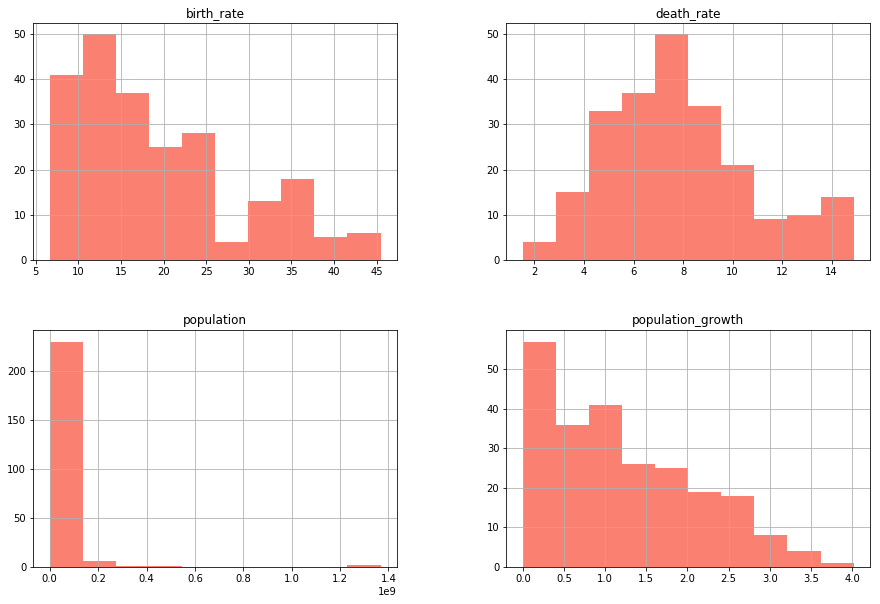

In [8]:
non_outliers.hist(figsize=(15,10),color='salmon')

We can observe the following:

* Most countries have a birth rate that ranges between 10% and 15% and a death rate between 7% and 8%. 
* The majority of countries have a population of less than 100 Million people.
* Most countries have a population growth of less than 0.5%.

Now let us explore these numbers further.

## Population Density

In [15]:
facts=pd.read_sql_query('select * from facts',conn)
facts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 11 columns):
id                   261 non-null int64
code                 261 non-null object
name                 261 non-null object
area                 249 non-null float64
area_land            246 non-null float64
area_water           243 non-null float64
population           242 non-null float64
population_growth    236 non-null float64
birth_rate           228 non-null float64
death_rate           228 non-null float64
migration_rate       223 non-null float64
dtypes: float64(8), int64(1), object(2)
memory usage: 22.5+ KB


In [21]:
facts['density']=facts['population']/facts['area']
facts[['name','density']].sort_values(by='density',ascending=False).head()

,name,density
189,Holy See (Vatican City),inf
204,Macau,2.116896e+04
116,Monaco,1.526750e+04
155,Singapore,8.141280e+03
203,Hong Kong,6.445042e+03


We have an odd result, let us look into row 189:

In [22]:
facts.iloc[189]

id                                       190
code                                      vt
name                 Holy See (Vatican City)
area                                       0
area_land                                  0
area_water                                 0
population                               842
population_growth                          0
birth_rate                               NaN
death_rate                               NaN
migration_rate                           NaN
density                                  inf
Name: 189, dtype: object

The area of 0 explains the density of infinity.